In [2]:
import numpy as np
import pandas as pd
import scipy.stats
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Exploration

In [3]:
## import and view
mobile_data = data_one = pd.read_csv('AppleStore.csv')
print(mobile_data)

## identify top 5 genre
mobile_types = mobile_data.groupby('prime_genre').count()
mobile_types.nlargest(5,'currency')

      Unnamed: 0          id  \
0              1   281656475   
1              2   281796108   
2              3   281940292   
3              4   282614216   
4              5   282935706   
5              6   283619399   
6              7   283646709   
7              8   284035177   
8              9   284666222   
9             10   284736660   
10            11   284791396   
11            12   284815117   
12            13   284815942   
13            14   284847138   
14            15   284862767   
15            16   284876795   
16            17   284882215   
17            18   284910350   
18            20   284993459   
19            21   285005463   
20            22   285946052   
21            23   285994151   
22            24   286058814   
23            25   286070473   
24            27   286799607   
25            28   286906691   
26            29   286911400   
27            31   288113403   
28            32   288120394   
29            33   288419283   
...     

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
prime_genre,,,,,,,,,,,,,,,,
Games,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862,3862
Entertainment,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535,535
Education,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453,453
Photo & Video,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349,349
Utilities,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248,248


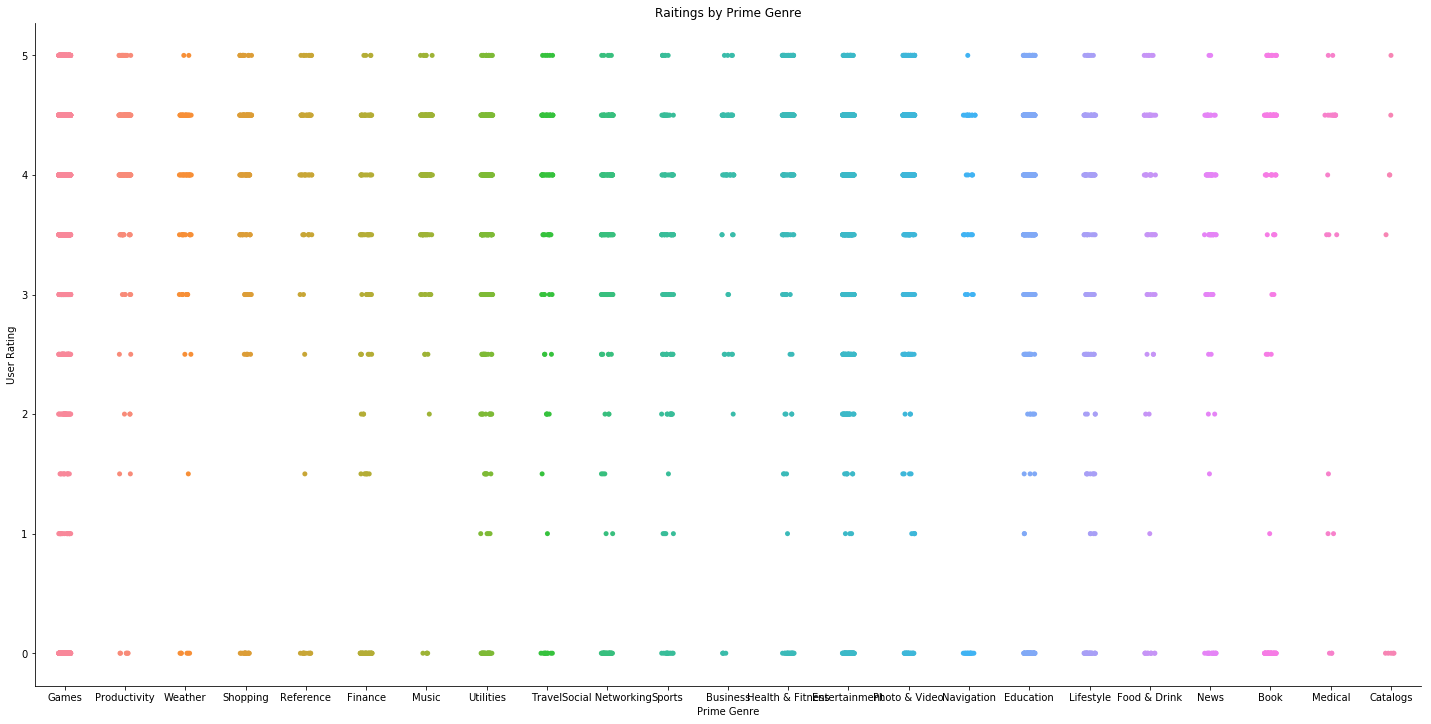

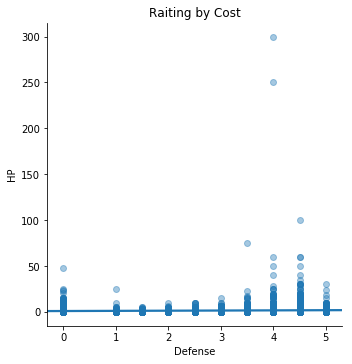

In [9]:
## plot user rating by genre
x=sns.catplot(x="prime_genre", y="user_rating",
               height=10, aspect= 2 / 1,
               data= mobile_data)
x.set_ylabels("User Rating")
x.set_xlabels("Prime Genre")
plt.title('Raitings by Prime Genre')
plt.show()



y = sns.lmplot(y='price', 
               x='user_rating',
               data=mobile_data, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
y.set_ylabels("HP")
y.set_xlabels("Defense")
plt.title('Raiting by Cost')
plt.show()




Raiting by cost is does not give us a great look at the data because of the outliers

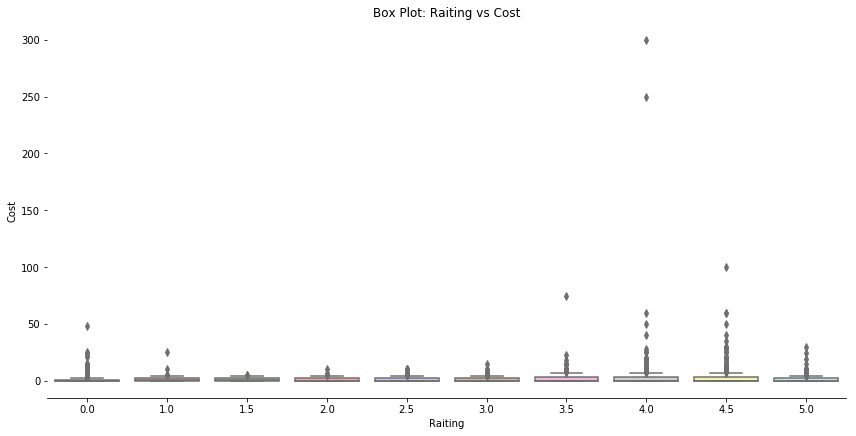

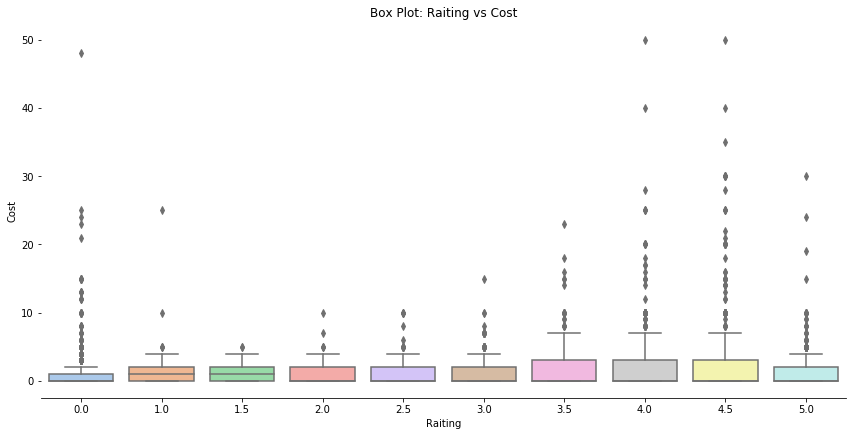

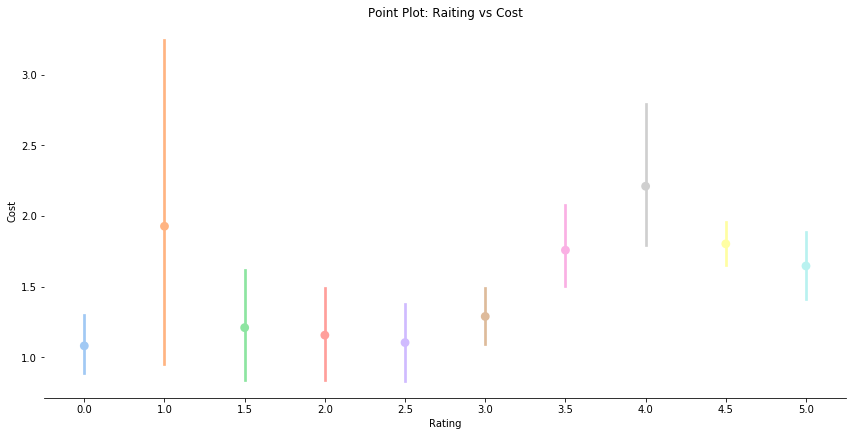

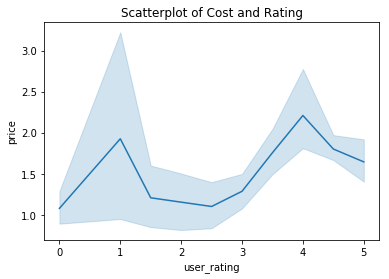

In [18]:
### Box-Chart to get a better look at distribution

z = sns.catplot(x="user_rating", y="price", data=mobile_data, 
                 kind="box", palette="pastel",
                 height=6, aspect= 2 / 1,ci=95)
z.despine(left=True)
z.set_ylabels("Cost")
z.set_xlabels("Raiting")
plt.title('Box Plot: Raiting vs Cost')
plt.show()

### outliers removed to get a better look at the data
outliers_removed=mobile_data[mobile_data['price'] < 50]

b = sns.catplot(x="user_rating", y="price", data=outliers_removed, 
                 kind="box", palette="pastel",
                 height=6, aspect= 2 / 1,ci=95)
b.despine(left=True)
b.set_ylabels("Cost")
b.set_xlabels("Raiting")
plt.title('Box Plot: Raiting vs Cost')
plt.show()

#### Point plot of Rating vs Cost
c = sns.catplot(x="user_rating", y="price", data=mobile_data, 
                 kind="point", palette="pastel",
                 height=6, aspect= 2 / 1,ci=95)
c.despine(left=True)
c.set_ylabels("Cost")
c.set_xlabels("Rating")
plt.title('Point Plot: Raiting vs Cost')
plt.show()

### Line plit of Raiting vs Cost
sns.lineplot(y='price', 
               x='user_rating',
               data=mobile_data)
g.set_ylabels("Cost")
g.set_xlabels("Rating")
plt.title('Scatterplot of Cost and Rating')
plt.show()

# The Problem

With so many aps in the ap store, its difficult to make yourself stand out from the competition. Finding and pleaseing a user base is difficult, and many time the raiting of previous users is going to be the biggest influence on others finding your ap through all the "noise". 

The data shows a vast variety of apps, across different categories with different ratings, but we do not have a great understanding of the app being free or having an associated cost effects the overall rating of the app. Do people expect more when they pay for an app and grade on a harder scale? Should all apps be presented as free apps with paid add ons in order to increase their overall rating in the App store? 

# The potential solution

The hypothesis is that in order to receive a higher rating on the App store we should launch free apps rather than have people pay for the apps. 

# Testing


In order to test the hypothesis we should create five apps, one in each of the five major genres Games, Entertainment, Education, Photo/Video and Utilities.



These five apps should than be released as two versions,  group A ( free app) and group B ( $.99 app). The changes in the aps themselves should be as minimal as possible,  with the only real change being the name of each app. All other interfaces and functionality should remain the same.  We will them compare the ratings each of the ap receive from group A to group B to determine the effect of cost on user ratings of the ap. 
In order to keep the results of the test as unbiased as possible the following measures should be taken. 
-	To properly set up this test we need to work with the Ap Store to “hard code” reviews and a rating of 3.5 for both the paid and the free ap in order to keep respondents answers isolated from one another
-	Because people will be much more likely to download the free version of the ap, we will take samples of each the paid and free reviews in order to compare the test groups once the paid apps hit the pre-established threshold of 10,000 reviews. 


In order for the hypothesis to be proven true, we would expect a 10% overall higher rating for the free versions of the aps or a 3% overall higher rating for each of the five apps .  
